#Distâncias até a estação de metrô mais próxima

In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp
!pip install shapely  ==1.7.0
!pip install --upgrade descartes
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
#!pip install pysal

**Fonte de Dados**

https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [ ]:
import geopandas as gpd

In [ ]:
metro = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/Transporte/Metrô/Estações_Metrô.geojson')
metro

In [ ]:
metro.crs

In [ ]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
metro

In [ ]:
metro.crs

In [ ]:
rj = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


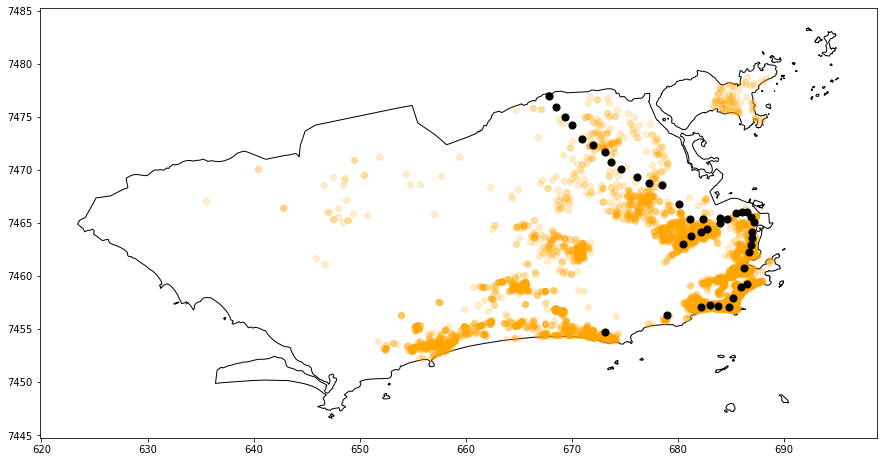

In [ ]:
base = rj.plot(color='white', edgecolor = 'black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize = 50)

In [ ]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

In [ ]:
#Função que calcula a distância entre 2 pontos
distances = metro.distance(geo_dados.iloc[0].geometry)
distances.min()

In [ ]:
import time

In [ ]:
#FOR para calcular a distancia de cada imóvel e a sua estação de metro mais próxima
distances = []
for i in range(geo_dados.shape[0]):
  distances.append(metro.distance(geo_dados.iloc[i].geometry).min())
len(distances)

4513

In [ ]:
#Calculando td de uma vez agora com a função lambda
start_time = time.time()
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda y: metro.distance(y).min())
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248


In [ ]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [ ]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])
coef

-0.195640831616868

In [ ]:
geo_dados.to_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

##Exercício
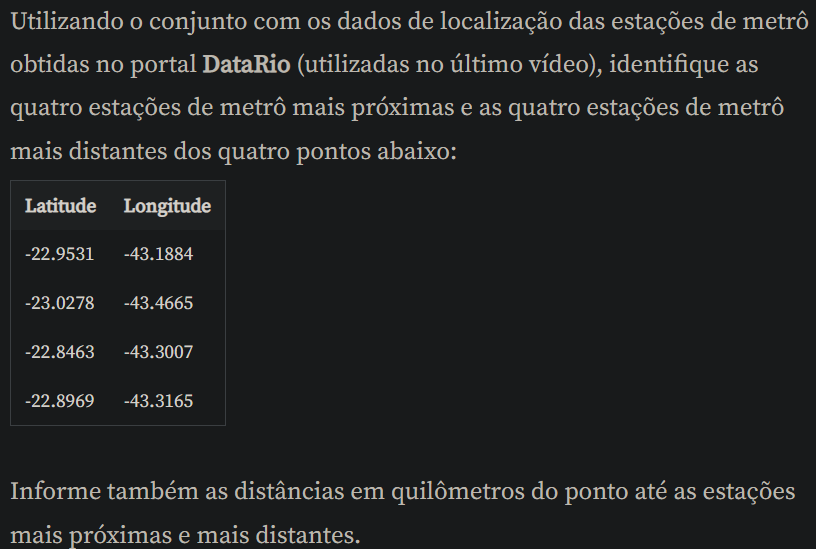

In [ ]:
#Criando o DataFrame
import pandas as pd
dados_df = [[-22.9531,	-43.1884],
[-23.0278,	-43.4665],
[-22.8463,	-43.3007],
[-22.8969,	-43.3165]]
df = pd.DataFrame(data = dados_df, columns=['Latitude', 'Longitude'])
df

,Latitude,Longitude
0,-22.9531,-43.1884
1,-23.0278,-43.4665
2,-22.8463,-43.3007
3,-22.8969,-43.3165


In [ ]:
from shapely.geometry import Point
crs = {'init': 'epsg:4326'}
x = zip(df.Longitude, df.Latitude)
geometry = [Point(i) for i in x]
gdf = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
gdf

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (-43.18840 -22.95310)
1,-23.0278,-43.4665,POINT (-43.46650 -23.02780)
2,-22.8463,-43.3007,POINT (-43.30070 -22.84630)
3,-22.8969,-43.3165,POINT (-43.31650 -22.89690)


In [ ]:
gdf = gdf.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
gdf

,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (685.741 7460.527)
1,-23.0278,-43.4665,POINT (657.136 7452.580)
2,-22.8463,-43.3007,POINT (674.361 7472.491)
3,-22.8969,-43.3165,POINT (672.676 7466.906)


In [ ]:
metro.head(1)

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,None,0,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)


In [ ]:
gdf['Dist_Min'] = gdf['geometry'].apply(lambda x: "{0:.2f} km".format(metro.distance(x).min()))
gdf['Dist_Max'] = gdf['geometry'].apply(lambda x: "{0:.2f} km".format(metro.distance(x).max()))

In [ ]:
#Localizando o Nome da estação de metrô com FOR
Metro_Perto = []
Metro_Longe = []
for i in range(gdf.shape[0]):
  Metro_Perto.append(metro['Nome'].iloc[metro.distance(gdf.iloc[i].geometry).idxmin()])
  Metro_Longe.append(metro['Nome'].iloc[metro.distance(gdf.iloc[i].geometry).idxmax()])
gdf['Metro_Perto'] = Metro_Perto
gdf['Metro_Longe'] = Metro_Longe
gdf[['Metro_Perto', 'Dist_Min', 'Metro_Longe', 'Dist_Max']]

,Metro_Perto,Dist_Min,Metro_Longe,Dist_Max
0,Botafogo,0.51 km,Pavuna,24.31 km
1,Jardim Oceânico,16.12 km,Cinelândia,32.51 km
2,Vicente de Carvalho,1.53 km,Ipanema / General Osório,18.65 km
3,Engenho da Rainha,3.77 km,Cardeal Arcoverde,15.80 km


In [ ]:
#Localizando o Nome da estação de metrô com Lambda

gdf['Metro_Perto'] = gdf['geometry'].apply(lambda x: metro['Nome'].iloc[metro.distance(x).idxmin()])
gdf['Metro_Longe'] = gdf['geometry'].apply(lambda x: metro['Nome'].iloc[metro.distance(x).idxmax()])
gdf[['Metro_Perto', 'Dist_Min', 'Metro_Longe', 'Dist_Max']]

,Metro_Perto,Dist_Min,Metro_Longe,Dist_Max
0,Botafogo,0.51 km,Pavuna,24.31 km
1,Jardim Oceânico,16.12 km,Cinelândia,32.51 km
2,Vicente de Carvalho,1.53 km,Ipanema / General Osório,18.65 km
3,Engenho da Rainha,3.77 km,Cardeal Arcoverde,15.80 km
